In [8]:
pip install praw

  Using cached praw-7.8.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached prawcore-2.4.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl.metadata (2.3 kB)
Using cached praw-7.8.1-py3-none-any.whl (189 kB)
Using cached prawcore-2.4.0-py3-none-any.whl (17 kB)
Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)

   -------------------------- ------------- 2/3 [praw]
   ---------------------------------------- 3/3 [praw]

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from botDetector import generate_bot_score

In [2]:
bots = pd.read_csv('botbouncer_ground_truth.csv')

In [3]:
bots

,username,bot,status
0,harv318,True,banned
1,InitialTension8916,True,banned
2,filkbcwa,True,banned
3,Simsim123454321,True,banned
4,goyongj,True,banned
...,...,...,...
926,Quantum_Pineapple,False,declined
927,Big_Dick_NRG,False,declined
928,Lancearon,False,declined
929,spookyspritebottle,False,declined


In [4]:
bots_test = pd.concat([bots[~bots['bot']].sample(30).copy(),bots[bots['bot']].sample(30).copy()])

In [11]:
bots_test['score'] = bots_test['username'].apply(generate_bot_score)

C:\Users\wkmp2\AppData\Local\Temp\ipykernel_28708\2417116360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bots_test['score'] = bots_test['username'].apply(generate_bot_score)


In [12]:
bots_test = bots_test.dropna()

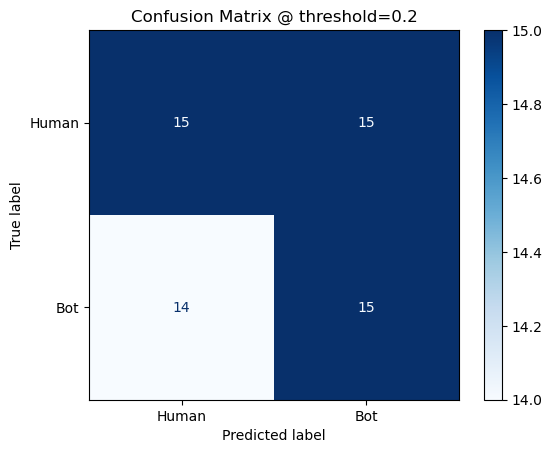

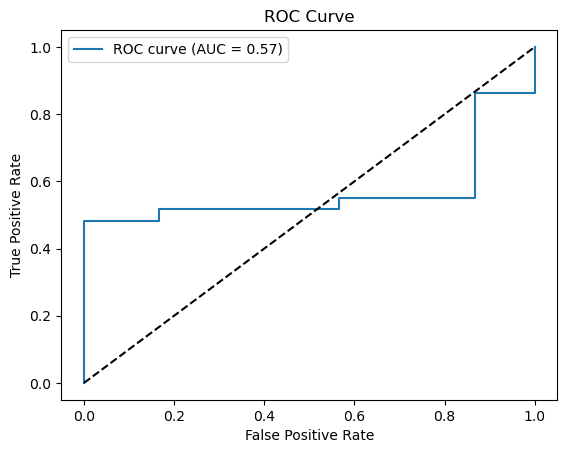

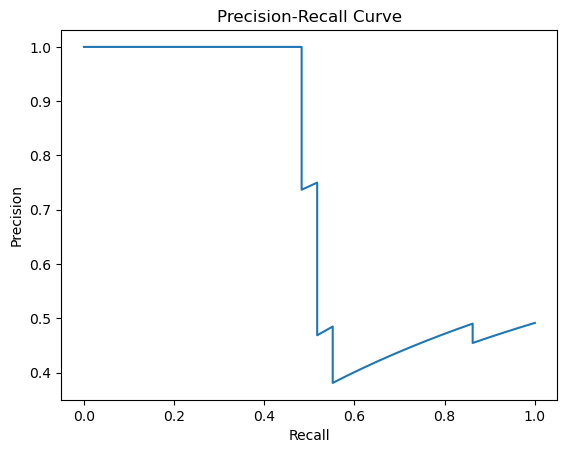

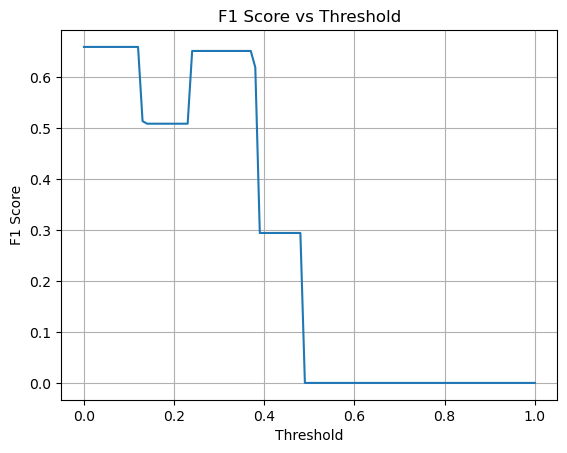

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    f1_score
)
import numpy as np

# Assume your DataFrame is called bots_df
y_true = bots_test['bot'].astype(int)  # Ground truth (1=bot, 0=human)
y_scores = bots_test['score']          # Predicted bot score

# ------------------------------
# Confusion matrix at default threshold (0.5)
# ------------------------------
threshold = 0.2
y_pred = (y_scores >= threshold).astype(int)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Human', 'Bot'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix @ threshold={threshold}')
plt.show()

# ------------------------------
# ROC Curve
# ------------------------------
fpr, tpr, roc_thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ------------------------------
# Precision-Recall Curve
# ------------------------------
precision, recall, pr_thresholds = precision_recall_curve(y_true, y_scores)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ------------------------------
# F1 vs Threshold Curve
# ------------------------------
f1_scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    preds = (y_scores >= t).astype(int)
    f1_scores.append(f1_score(y_true, preds))

plt.figure()
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.show()


In [53]:
bots[~bots['bot']]

,username,bot,status
183,Normal_Ad_6645,False,declined
185,BunsMcNuggets,False,declined
186,Later_Doober,False,declined
187,nefaariowarbear,False,declined
188,TwoIdleHands,False,declined
...,...,...,...
925,CatLightyear,False,declined
926,Quantum_Pineapple,False,declined
927,Big_Dick_NRG,False,declined
928,Lancearon,False,declined
